<a href="https://colab.research.google.com/github/jalcuevag/estadistica-grupal/blob/main/Actividad2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import models
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold,  cross_val_score

from sklearn.preprocessing import LabelEncoder



from sklearn.model_selection import GridSearchCV
obesity = 'https://raw.githubusercontent.com/jalcuevag/regression/main/obesity.csv'
dataset_class = pd.read_csv(obesity)
dataset_class.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
dataset_class.shape

(2111, 17)

In [3]:
dataset_class.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
dataset_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
obj = (dataset_class.dtypes == object)
obj_cols = [c for c in obj.index if obj[c]]
obj_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [6]:
num = (dataset_class.dtypes == float) | (dataset_class.dtypes == int)
num_cols = [c for c in num.index if num[c]]
num_cols

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [7]:
frecuencias = dataset_class[obj_cols].apply(pd.value_counts).T.stack()
print(frecuencias)

Gender                          Female                   1043.0
                                Male                     1068.0
family_history_with_overweight  no                        385.0
                                yes                      1726.0
FAVC                            no                        245.0
                                yes                      1866.0
CAEC                            Always                     53.0
                                Frequently                242.0
                                Sometimes                1765.0
                                no                         51.0
SMOKE                           no                       2067.0
                                yes                        44.0
SCC                             no                       2015.0
                                yes                        96.0
CALC                            Always                      1.0
                                Frequent

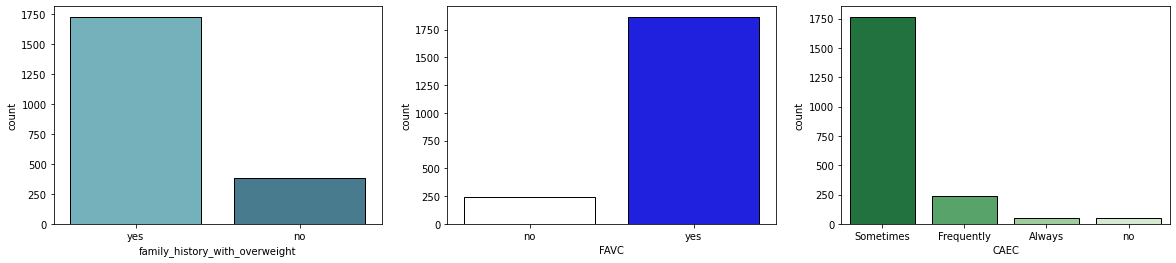

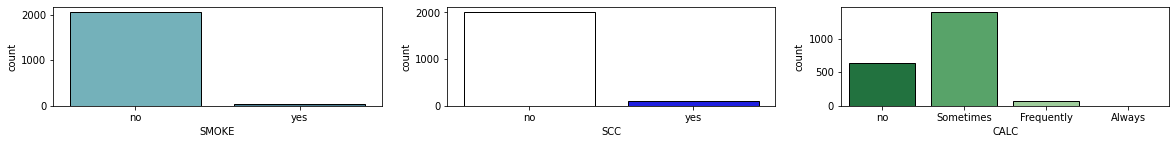

In [8]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'family_history_with_overweight', data = dataset_class, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'FAVC', data = dataset_class, palette="flag",edgecolor="black")
plt.subplot(133)
sns.countplot(x= 'CAEC', data = dataset_class, palette="Greens_r",edgecolor="black")

plt.figure(figsize=(20,4))
plt.subplot(231)
sns.countplot(x= 'SMOKE', data = dataset_class, palette="GnBu_d",edgecolor="black")
plt.subplot(232)
sns.countplot(x= 'SCC', data = dataset_class, palette="flag",edgecolor="black")
plt.subplot(233)
sns.countplot(x= 'CALC', data = dataset_class, palette="Greens_r",edgecolor="black")
plt.show()

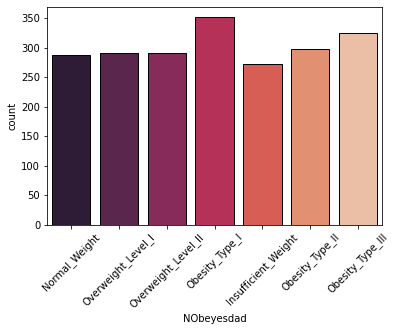

In [9]:
sns.countplot(x= 'NObeyesdad', data = dataset_class, palette="rocket",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

<Figure size 864x720 with 0 Axes>

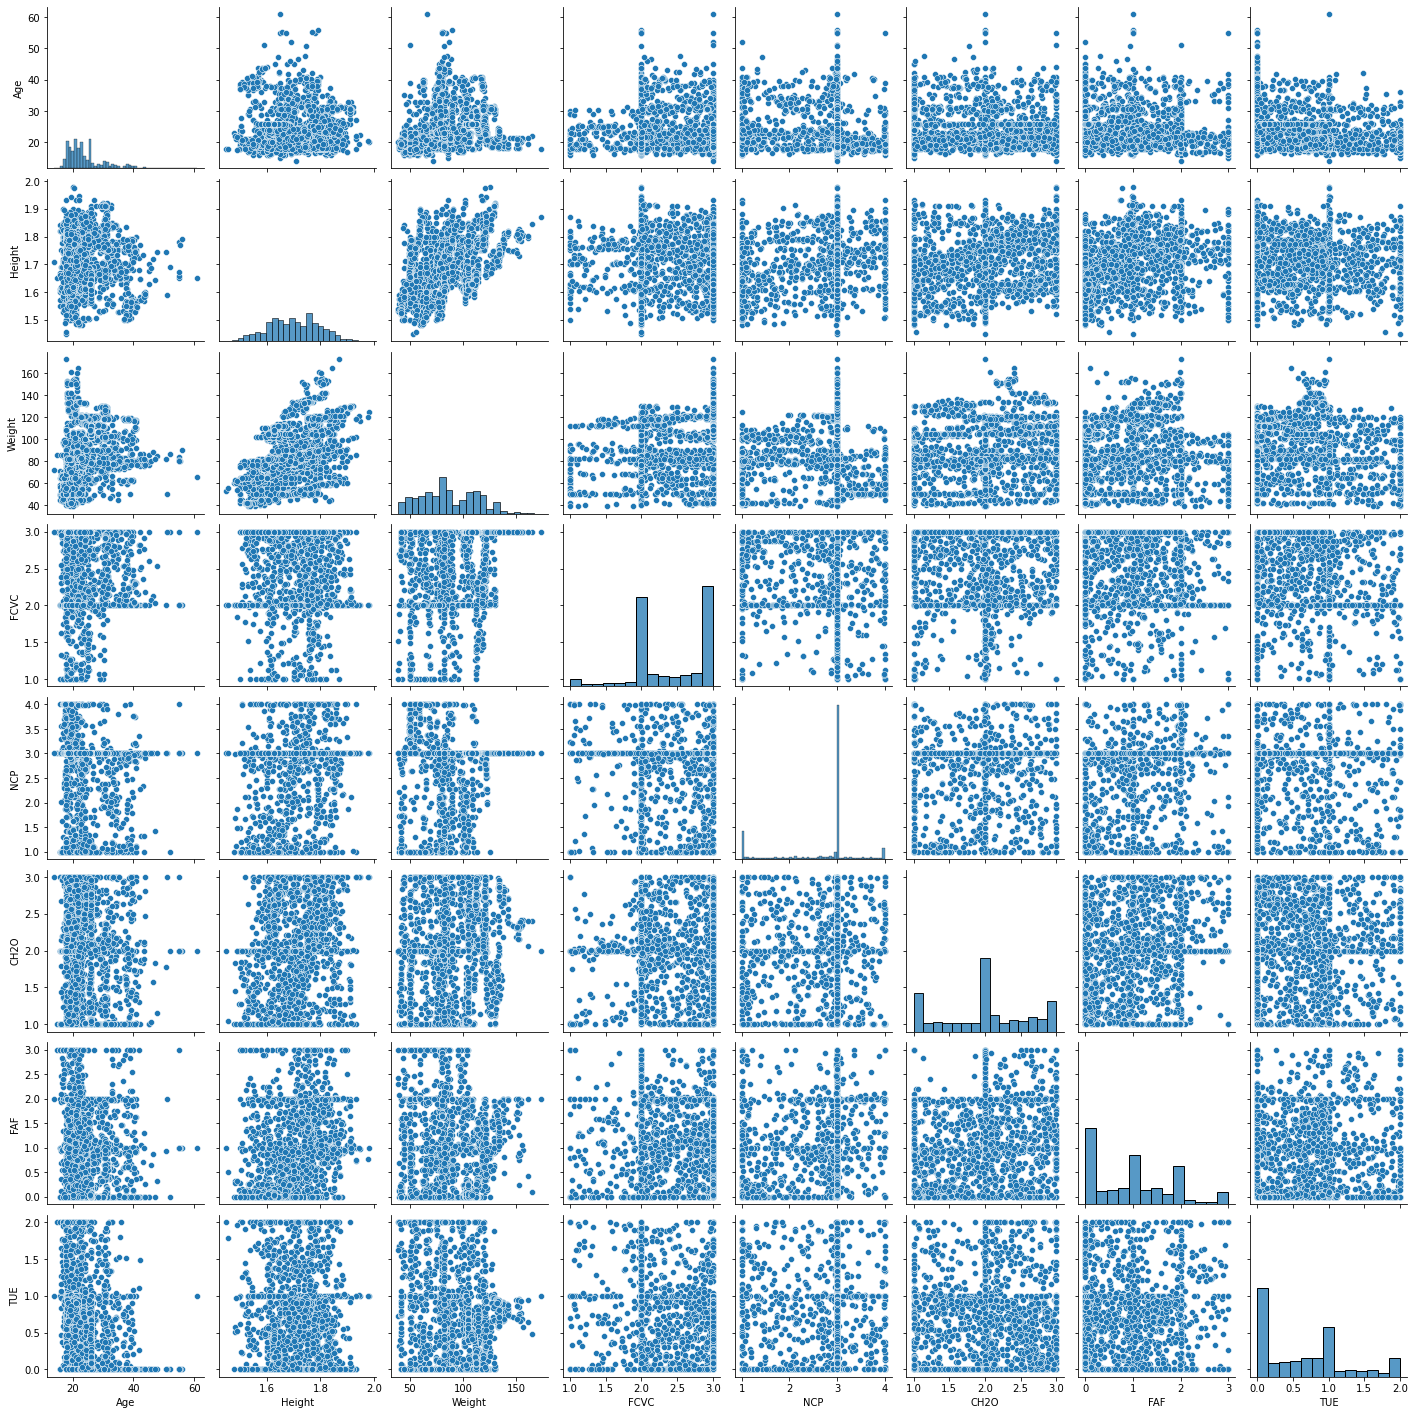

In [10]:
plt.figure(figsize=(12,10))
sns.pairplot(dataset_class)

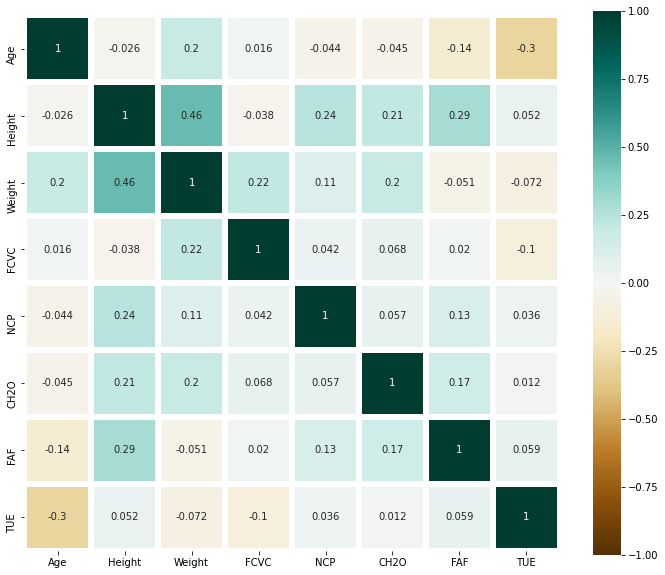

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset_class.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,
            cmap='BrBG',linewidths=5)

PREPROCESAMIENTO

In [12]:
dataset_class = dataset_class.drop(columns=['Height', 'Weight'])

In [13]:
labelEnc = LabelEncoder()

for col in obj_cols:
    dataset_class[col] = labelEnc.fit_transform(dataset_class[col])

dataset_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [14]:
X = dataset_class.drop(columns=["NObeyesdad"])

# Target variable
y = dataset_class['NObeyesdad']


X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=1, shuffle=True)




DT: 0.761858 (0.000000)
RF: 0.849005 (0.000000)
SVM: 0.425133 (0.000000)


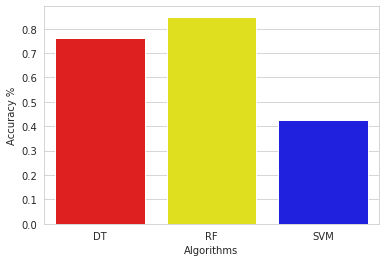

In [15]:
models = []

models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy').mean()
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results, cv_results.std()))

colors = ["red", "yellow", "blue"]

sns.set_style("whitegrid")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(names), y=list(results), palette=colors )
plt.show()

In [19]:
params = {'n_estimators':list(range(10,200, 10)),
              'criterion':['gini','entropy'],
              'max_depth':list(range(20, 50, 3))
              }

grid_RF = GridSearchCV(RandomForestClassifier(random_state=42),params,cv=5)
grid_RF.fit(X_train, Y_train)
print(grid_RF.best_params_)

{'criterion': 'entropy', 'max_depth': 23, 'n_estimators': 150}


Porcentaje de presición:  0.8503787878787878
Matriz de confusión: 
[[72  7  0  0  0  0  0]
 [ 3 45  1  0  0  1  7]
 [ 1  9 77  1  1  4  6]
 [ 0  2  0 66  0  0  2]
 [ 0  0  0  0 76  0  1]
 [ 2 16  2  1  0 55  1]
 [ 0  4  2  3  0  2 58]]
Reporte del clasificador: 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        79
           1       0.54      0.79      0.64        57
           2       0.94      0.78      0.85        99
           3       0.93      0.94      0.94        70
           4       0.99      0.99      0.99        77
           5       0.89      0.71      0.79        77
           6       0.77      0.84      0.81        69

    accuracy                           0.85       528
   macro avg       0.85      0.85      0.85       528
weighted avg       0.87      0.85      0.85       528



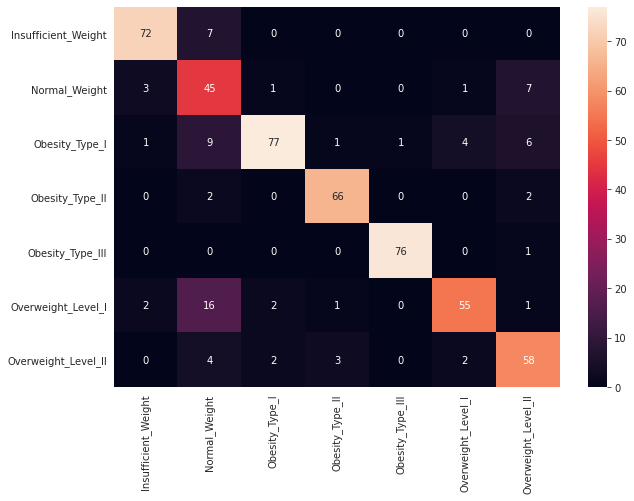

In [88]:
RFClassifier = RandomForestClassifier(criterion='entropy',max_depth=23, n_estimators=150)
RFClassifier.fit(X_train, Y_train)

predictions_rf = RFClassifier.predict(X_validation)

accuracy_rf = metrics.accuracy_score(Y_validation, predictions_rf)

print("Porcentaje de presición: ", accuracy_rf)

confusion_matrix_rf = metrics.confusion_matrix(Y_validation, predictions_rf)

print("Matriz de confusión: ")
print(confusion_matrix_rf)

print("Reporte del clasificador: ")
print(metrics.classification_report(Y_validation, predictions_rf))

df_cm = pd.DataFrame(confusion_matrix_rf, index = ["Insufficient_Weight", 
                                                   "Normal_Weight", 
                                                   "Obesity_Type_I", 
                                                   "Obesity_Type_II",
                                                   "Obesity_Type_III",
                                                   "Overweight_Level_I",
                                                   "Overweight_Level_II"],
                  columns = ["Insufficient_Weight", 
                            "Normal_Weight", 
                            "Obesity_Type_I", 
                            "Obesity_Type_II",
                            "Obesity_Type_III",
                            "Overweight_Level_I",
                            "Overweight_Level_II"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)


In [34]:
y_train_categorical = to_categorical(Y_train)
y_test_categorical = to_categorical(Y_validation)
y_test_categorical

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [93]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(14,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

In [94]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc']   
             )


In [95]:
history = model.fit(X_train,
                   y_train_categorical,
                   epochs=1000,
                   batch_size=512,
                   validation_data=(X_validation, y_test_categorical))

Epoch 1/1000
4/4 [==============================] - 1s 113ms/step - loss: 2.0251 - acc: 0.1045 - val_loss: 1.9323 - val_acc: 0.1458
Epoch 2/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.9290 - acc: 0.1915 - val_loss: 1.9101 - val_acc: 0.2159
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.9124 - acc: 0.1825 - val_loss: 1.8965 - val_acc: 0.2064
Epoch 4/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.8948 - acc: 0.2206 - val_loss: 1.8884 - val_acc: 0.2519
Epoch 5/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.8869 - acc: 0.2573 - val_loss: 1.8817 - val_acc: 0.2917
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.8783 - acc: 0.2867 - val_loss: 1.8624 - val_acc: 0.2538
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.8701 - acc: 0.2519 - val_loss: 1.8448 - val_acc: 0.3068
Epoch 8/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.8515 - a

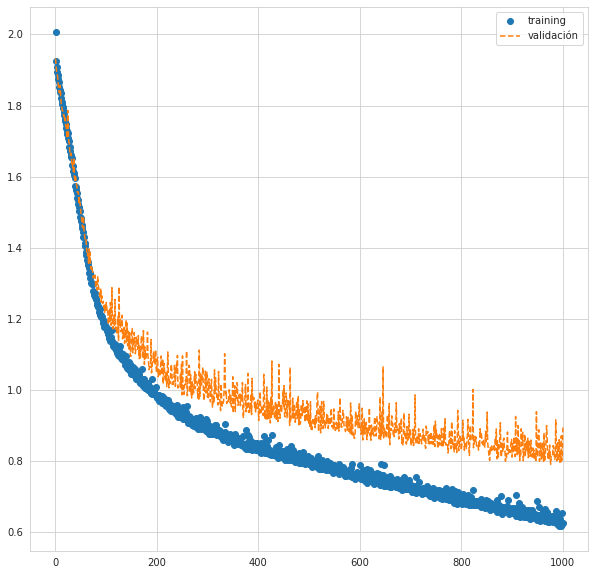

In [100]:

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='validación')
plt.legend()
plt.show()

In [97]:
results = model.evaluate(X_validation, y_test_categorical)
accuracy_rn = results[1]


17/17 [==============================] - 0s 1ms/step - loss: 0.8948 - acc: 0.7197


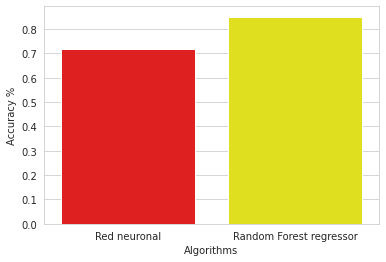

In [98]:
colors = ["red", "yellow"]

sns.set_style("whitegrid")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(["Red neuronal", "Random Forest regressor"]), y=list([accuracy_rn, accuracy_rf]), palette=colors )
plt.show()